**Data Extraction, Tranformation ,Loading**

In [0]:
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn import metrics
#from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
#importing data from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
data = pd.read_csv(r"/content/Customer_Churn2.csv")
data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [0]:
data.shape

(3333, 21)

**Data Exploration**

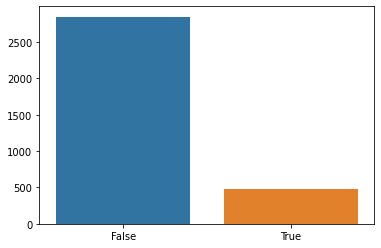

In [0]:
import seaborn as sns
y = data['churn'].value_counts()
sns.barplot(y.index, y.values)

**Conclusion: Dataset is imbalanced**

In [0]:
y_True = data["churn"][data["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / data["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


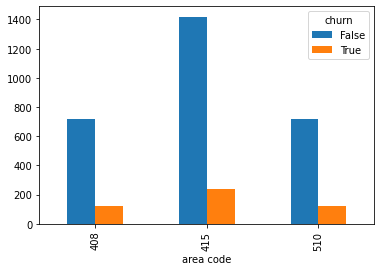

In [0]:
pd.crosstab(data['area code'],data['churn']).plot(kind = 'bar')
pd.crosstab(data['area code'],data['churn'])

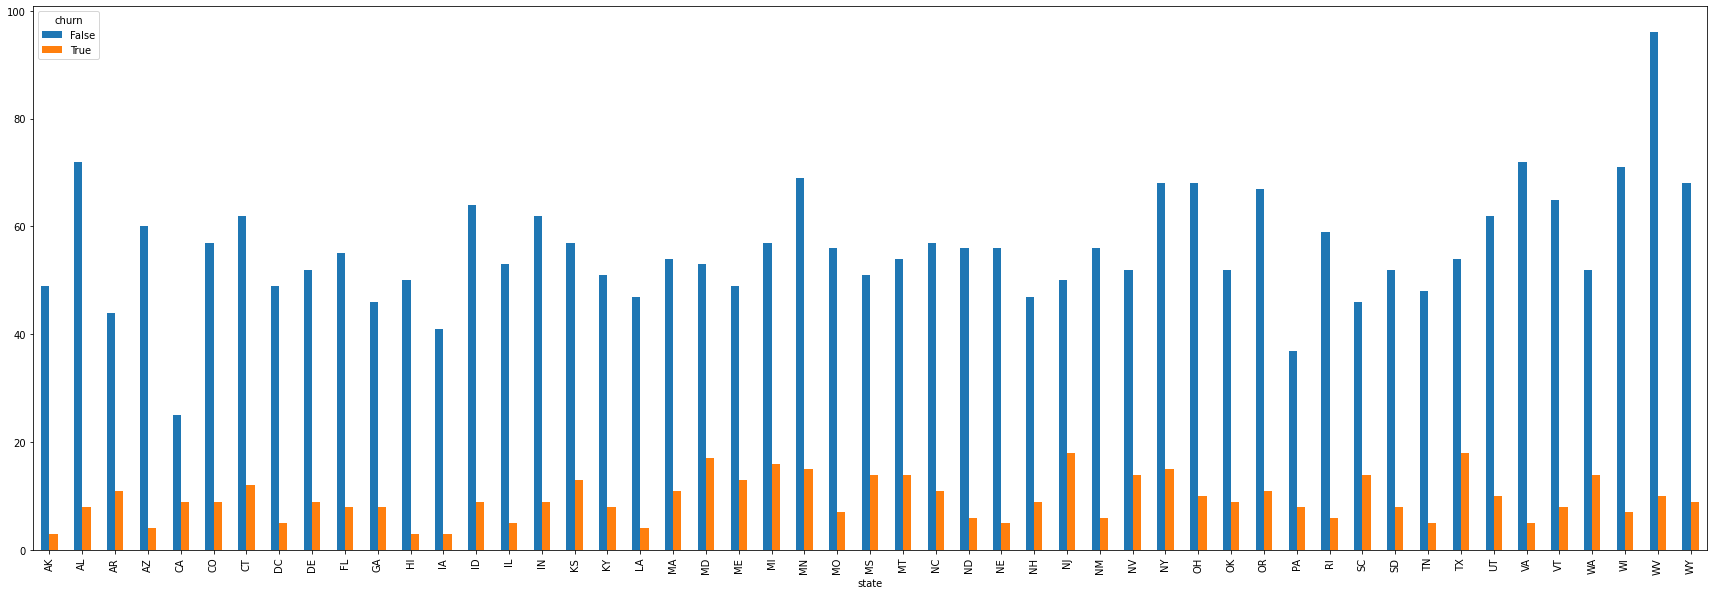

In [0]:
pd.crosstab(data['state'],data['churn']).plot(kind = 'bar',figsize=(30,10))
#pd.crosstab(data['state'],data['churn'])

In [0]:
len(data['account length'].unique())

212

In [0]:
len(data['phone number'].unique())

3333

,churn,total day minutes
0,False,175.175754
1,True,206.914079


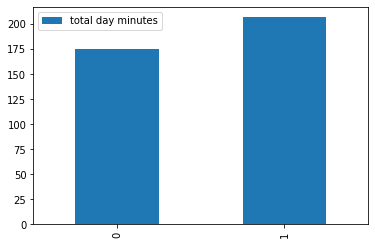

In [0]:
data.groupby(data['churn'],as_index=False)['total day minutes'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total day minutes'].mean()
#data.groupby(data['churn'],as_index=False)['total day minutes'].std()

,churn,total day calls
0,False,100.283158
1,True,101.335404


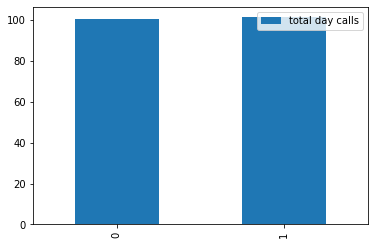

In [0]:
data.groupby(data['churn'],as_index=False)['total day calls'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total day calls'].mean()

,churn,total day charge
0,False,29.780421
1,True,35.175921


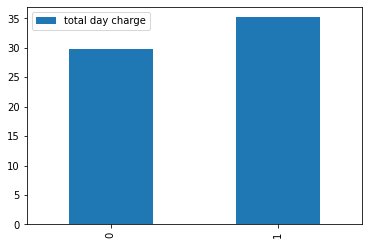

In [0]:
data.groupby(data['churn'],as_index=False)['total day charge'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total day charge'].mean()

,churn,total eve minutes
0,False,199.043298
1,True,212.410145


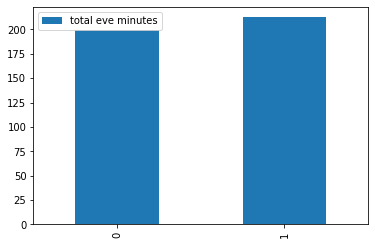

In [0]:
data.groupby(data['churn'],as_index=False)['total eve minutes'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total eve minutes'].mean()

,churn,total eve calls
0,False,100.038596
1,True,100.561077


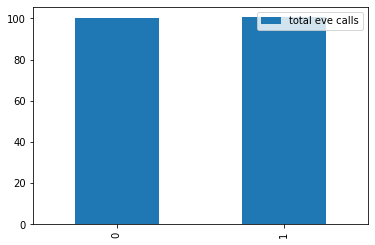

In [0]:
data.groupby(data['churn'],as_index=False)['total eve calls'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total eve calls'].mean()

,churn,total eve charge
0,False,16.918909
1,True,18.054969


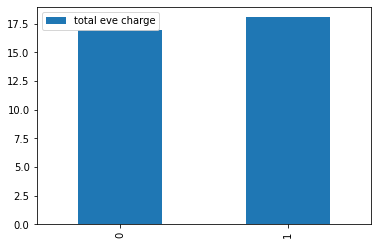

In [0]:
data.groupby(data['churn'],as_index=False)['total eve charge'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total eve charge'].mean()

,churn,total night minutes
0,False,200.133193
1,True,205.231677


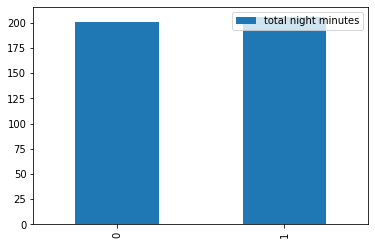

In [0]:
data.groupby(data['churn'],as_index=False)['total night minutes'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total night minutes'].mean()

,churn,total night calls
0,False,100.058246
1,True,100.399586


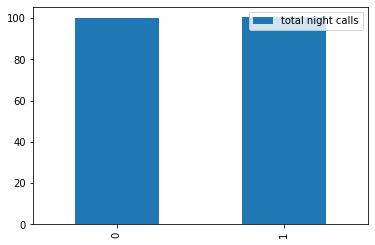

In [0]:
data.groupby(data['churn'],as_index=False)['total night calls'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total night calls'].mean()

,churn,total night charge
0,False,9.006074
1,True,9.235528


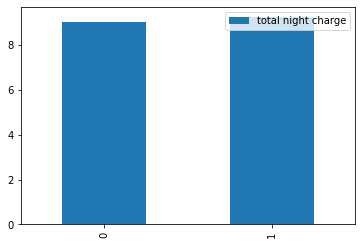

In [0]:
data.groupby(data['churn'],as_index=False)['total night charge'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total night charge'].mean()

,churn,total intl minutes
0,False,10.158877
1,True,10.700000


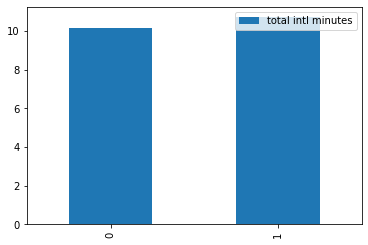

In [0]:
data.groupby(data['churn'],as_index=False)['total intl minutes'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total intl minutes'].mean()

,churn,total intl calls
0,False,4.532982
1,True,4.163561


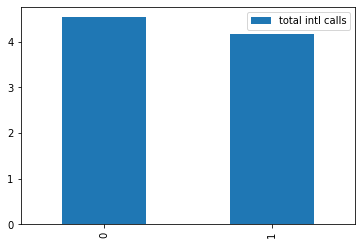

In [0]:
data.groupby(data['churn'],as_index=False)['total intl calls'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total intl calls'].mean()

,churn,total intl charge
0,False,2.743404
1,True,2.889545


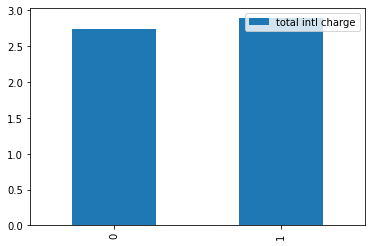

In [0]:
data.groupby(data['churn'],as_index=False)['total intl charge'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['total intl charge'].mean()

,churn,customer service calls
0,False,1.449825
1,True,2.229814


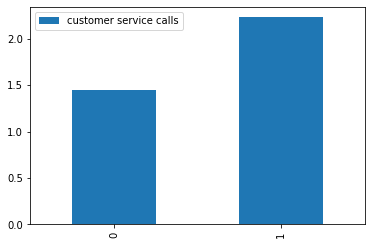

In [0]:
data.groupby(data['churn'],as_index=False)['customer service calls'].mean().plot(kind = 'bar')
data.groupby(data['churn'],as_index=False)['customer service calls'].mean()

churn,False,True
international plan,,
no,2664,346
yes,186,137


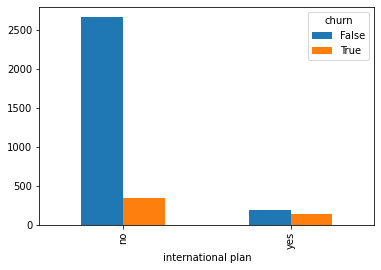

In [0]:
pd.crosstab(data['international plan'],data['churn']).plot(kind = 'bar')
pd.crosstab(data['international plan'],data['churn'])

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


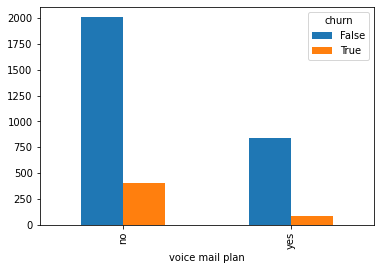

In [0]:
pd.crosstab(data['voice mail plan'],data['churn']).plot(kind = 'bar')
pd.crosstab(data['voice mail plan'],data['churn'])

**Data Manipulation and Preprocessing**

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
labenc = LabelEncoder()
data['state'] = labenc.fit_transform(data['state'])
data['international plan'] = labenc.fit_transform(data['international plan'])
data['voice mail plan'] = labenc.fit_transform(data['voice mail plan'])

In [0]:
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [0]:
y = data['churn']
y

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

**Feature Selection** 

In [0]:
data.drop(columns = ['churn','phone number','account length'], axis = 1,inplace = True)
data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,49,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,39,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,6,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


**Running Recursive Feature Extraction**(Jump to last cell for details for Number of feature determination )

In [0]:
from sklearn.feature_selection import RFE
sel = RFE(ensemble.RandomForestClassifier(n_estimators = 100,random_state = 0,n_jobs = -1),n_features_to_select = 13)

train_x,test_x,train_y,test_y = train_test_split(data,y,test_size = 0.2)
sel.fit(train_x,train_y)
sel.get_support()


array([False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True])

In [0]:
data.drop(columns= ['state','area code','voice mail plan','total eve charge','total night charge'],axis = 1,inplace = True)
data.head(10) 

,international plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,total intl charge,customer service calls
0,0,25,265.1,110,45.07,197.4,99,244.7,91,10.0,3,2.70,1
1,0,26,161.6,123,27.47,195.5,103,254.4,103,13.7,3,3.70,1
2,0,0,243.4,114,41.38,121.2,110,162.6,104,12.2,5,3.29,0
3,1,0,299.4,71,50.90,61.9,88,196.9,89,6.6,7,1.78,2
4,1,0,166.7,113,28.34,148.3,122,186.9,121,10.1,3,2.73,3
5,1,0,223.4,98,37.98,220.6,101,203.9,118,6.3,6,1.70,0
6,0,24,218.2,88,37.09,348.5,108,212.6,118,7.5,7,2.03,3
7,1,0,157.0,79,26.69,103.1,94,211.8,96,7.1,6,1.92,0
8,0,0,184.5,97,31.37,351.6,80,215.8,90,8.7,4,2.35,1
9,1,37,258.6,84,43.96,222.0,111,326.4,97,11.2,5,3.02,0


In [0]:
X = data.to_numpy().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32758048,  1.23488274,  1.56676695, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [-0.32758048,  1.30794844, -0.33373776, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [-0.32758048, -0.59175986,  1.16830364, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-0.32758048, -0.59175986,  0.01881963, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 3.05268496, -0.59175986,  0.62477766, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.32758048,  1.23488274,  1.00304237, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [0]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=10,shuffle = False,random_state=None)

    y_pred = y.copy()
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [0]:
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.90
Logistic Regression:           0.86


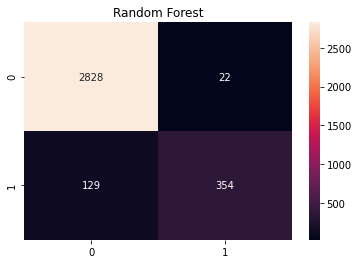

In [0]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

Text(0.5, 1.0, 'K Neighbours Classifiers')

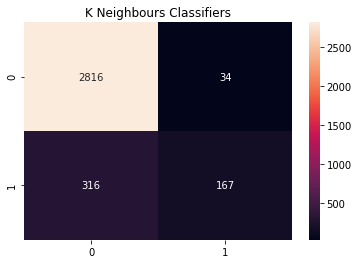

In [0]:
knn_conf_matrix = metrics.confusion_matrix(y,stratified_cv(X,y,neighbors.KNeighborsClassifier))
sns.heatmap(knn_conf_matrix,annot=True,fmt='')
title = 'K Neighbours Classifiers'
plt.title(title)

Text(0.5, 1.0, 'Logistic Regression')

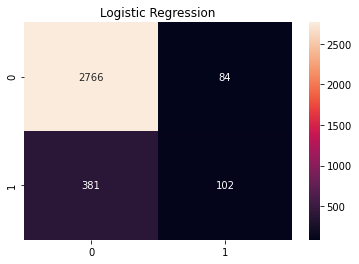

In [0]:
knn_conf_matrix = metrics.confusion_matrix(y,stratified_cv(X,y,linear_model.LogisticRegression))
sns.heatmap(knn_conf_matrix,annot=True,fmt='')
title = 'Logistic Regression'
plt.title(title)

In [0]:
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97      2850
        True       0.94      0.73      0.83       483

    accuracy                           0.95      3333
   macro avg       0.95      0.86      0.90      3333
weighted avg       0.95      0.95      0.95      3333


K Nearest Neighbor Classifier:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94      2850
        True       0.83      0.35      0.49       483

    accuracy                           0.89      3333
   macro avg       0.86      0.67      0.71      3333
weighted avg       0.89      0.89      0.88      3333


Logistic Regression:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92      2850
        True       0.55      0.21      0.30       483

    accuracy                           0.86      3333
   macro avg       0.71      0.59      0.61  

In [0]:
X.shape

(3333, 18)

[0.08991914 0.04393968 0.15107973 0.04119933 0.14761355 0.10409673
 0.03716996 0.05468044 0.03953512 0.05284224 0.06288969 0.05248516
 0.12254923]


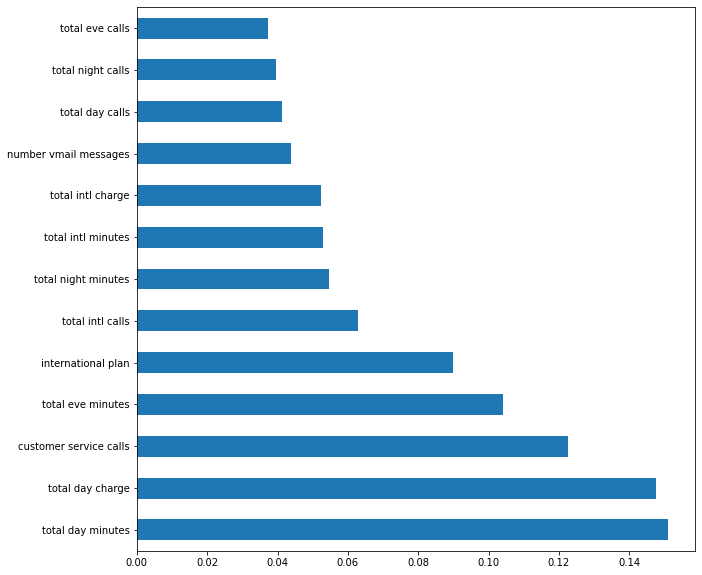

In [0]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(data,y)
feature_importance = rfc.feature_importances_
print (rfc.feature_importances_)
feat_importances = pd.Series(rfc.feature_importances_, index=data.columns)
feat_importances = feat_importances.nlargest(18)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [0]:
def stratified_cv_rfe(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=10,shuffle = False,random_state=None)
    #stratified_k_fold.get_n_splits(X,y)

    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [0]:
wfor i in range(1,19):
    sel = RFE(ensemble.RandomForestClassifier(n_estimators = 100,random_state = 0, n_jobs = -1),n_features_to_select = i)
    print('Random Forest Classifier with No of Features:\n {}\n'.format(metrics.accuracy_score(y, stratified_cv_rfe(X, y, sel))))

Random Forest Classifier with No of Features:
 0.8160816081608161

Random Forest Classifier with No of Features:
 0.8706870687068707

Random Forest Classifier with No of Features:
 0.8685868586858686

Random Forest Classifier with No of Features:
 0.8673867386738674

Random Forest Classifier with No of Features:
 0.9057905790579058

Random Forest Classifier with No of Features:
 0.9096909690969097

Random Forest Classifier with No of Features:
 0.9138913891389139

Random Forest Classifier with No of Features:
 0.9300930093009301

Random Forest Classifier with No of Features:
 0.9384938493849385

Random Forest Classifier with No of Features:
 0.946894689468947

Random Forest Classifier with No of Features:
 0.948994899489949

Random Forest Classifier with No of Features:
 0.9567956795679567

Random Forest Classifier with No of Features:
 0.9558955895589559

Random Forest Classifier with No of Features:
 0.9552955295529553

Random Forest Classifier with No of Features:
 0.951095109510951